# Taller 1 - Ciencia de Datos Aplicada
- Nombre: María Catalina Ibáñez Piñeres - 201922462
- Dataset: New Orleans, Lousiana, USA

In [213]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind, shapiro, mannwhitneyu, chi2_contingency

In [136]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

## 1. Carga de datos

In [137]:
# Se cargan los datos de Airbnb de la ciudad de New Orleans, Louisiana, USA
listings = pd.read_csv("listings.csv")

## 2. Entendimiento inicial de los datos

In [138]:
# Miramos las dimensiones del dataframe
listings.shape

(7118, 75)

In [139]:
# Miramos los tipos de datos de las columnas
listings.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

In [140]:
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,970324090541593163,https://www.airbnb.com/rooms/970324090541593163,20240905175050,2024-09-05,city scrape,Comfort in Bywater,"Kick back and relax in this calm, stylish spac...",Bywater is one of New Orleans' most delightful...,https://a0.muscache.com/pictures/miso/Hosting-...,56212513,https://www.airbnb.com/users/show/56212513,Amanda,2016-01-26,"Portland, OR",NaN,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/244b3...,https://a0.muscache.com/im/pictures/user/244b3...,St. Claude,1,1,"['email', 'phone']",t,t,Neighborhood highlights,St. Claude,NaN,29.966211,-90.041057,Entire home,Entire home/apt,4,1.0,1 bath,2.0,2.0,"[""Carbon monoxide alarm"", ""Central heating"", ""...",$83.00,30,365,30.0,30.0,365.0,365.0,30.0,365.0,NaN,t,0,0,0,82,2024-09-05,3,3,0,2024-02-01,2024-05-06,5.00,5.0,5.00,5.00,5.00,5.00,5.0,NaN,f,1,1,0,0,0.41
1,768293169006662066,https://www.airbnb.com/rooms/768293169006662066,20240905175050,2024-09-05,city scrape,Cozy and Comfortable,NaN,"Lots of restaurants, bars, and music within wa...",https://a0.muscache.com/pictures/miso/Hosting-...,136665450,https://www.airbnb.com/users/show/136665450,Joshua,2017-06-23,"New Orleans, LA",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/bbc83...,https://a0.muscache.com/im/pictures/user/bbc83...,St. Claude,1,1,"['email', 'phone']",t,t,Neighborhood highlights,St. Claude,NaN,29.972380,-90.042320,Private room in home,Private room,4,2.0,2 baths,2.0,2.0,"[""TV"", ""Wifi"", ""Carbon monoxide alarm"", ""Kitch...",$180.00,30,90,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,NaN,30,60,90,365,2024-09-05,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
2,1069600842896440330,https://www.airbnb.com/rooms/1069600842896440330,20240905175050,2024-09-05,city scrape,"Tons of Space,10 Beds,3 1/2 Bath",Beautiful apartment with plenty of space! Five...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,556686789,https://www.airbnb.com/users/show/556686789,Joe,2024-01-15,NaN,NaN,within an hour,90%,75%,f,https://a0.muscache.com/im/pictures/user/7f605...,https://a0.muscache.com/im/pictures/user/7f605...,Algiers,1,1,"['email', 'phone']",t,t,NaN,Algiers Point,NaN,29.953003,-90.050669,Entire rental unit,Entire home/apt,12,3.5,3.5 baths,5.0,10.0,"[""Carbon monoxide alarm"", ""Central heating"", ""...",$638.00,1,365,1.0,2.0,365.0,365.0,1.3,365.0,NaN,t,19,46,76,111,2024-09-05,3,3,0,2024-02-18,2024-07-06,5.00,5.0,5.00,5.00,5.00,5.00,5.0,"23rstr-02500, 23ostr-01343",f,1,1,0,0,0.45
3,23588926,https://www.airbnb.com/rooms/23588926,20240905175050,2024-09-05,city scrape,Superdome Lux Home,Awesome location!!<br />5 minute drive from th...,Quiet friendly block.,https://a0.muscach

In [141]:
# Showing the number of unique values of listing ids
# This can be helpful to diagnose duplicity
listings["id"].nunique()

7118

A partir de los objetivos planteados y revisando el diccionario de datos, se consideran relevantes para el análisis las siguientes variables:
- `neighborhood_cleansed`: la ubicación es uno de los factores más importantes para asegurar una alta tasa de ocupación y rentabilidad en propiedades de alquiler vacacional. Algunos barrios pueden ser más atractivos para los turistas que otros por su proximidad a lugares de interés, seguridad, oferta de restaurantes, entre otros. Analizar esta variable permitirá identificar los sectores más demandados y rentables de la ciudad.
- `room_type`: analizar esta variable permitirá identificar qué tipo de alojamiento tiene mayor demanda en diferentes barrios lo que ayuda a los inversores a optimizar sus ofertas y mejorar la ocupación. Se escogió sobre `property_type` porque es más específica y puede dar una idea más clara de las preferencias de los viajeros.
- `accommodates`: la capacidad de la propiedad influye en el tipo de viajeros que se pueden atraer. Propiedades con mayor capacidad pueden ser más atractivas para grupos o familias, mientras que las de menor capacidad pueden ser más atractivas para parejas o viajeros solos. 
- `price`: el precio es un factor determinante en la elección de alojamiento. Analizar esta variable y su relación con otras permitirá identificar cuál es el rango de precios que se maneja en la ciudad y a establecer precios competitivos.
- `availability_365`: la disponibilidad futura muestra la ocupación y la popularidad de una propiedad a lo largo del tiempo. Altos niveles de disponibilidad pueden indicar una baja demanda, precios no competitivos o una mala gestión de la propiedad, mientras que bajos niveles de disponibilidad pueden indicar una alta demanda y precios competitivos.
- `review_scores_rating`: la calificación de los huéspedes es un indicador de la calidad de la propiedad y la satisfacción de los huéspedes. Propiedades con altas calificaciones tienden a tener mejores tasas de ocupación y precios más altos.
- `review_scores_location`: la ubicación es un factor clave en la elección de alojamiento. Propiedades con altas calificaciones de ubicación tienden a tener mejores tasas de ocupación y precios más altos.
- Los otras variables de review no se consideran relevantes para el análisis, porque se centran en aspectos operativos y de interacción con el huésped que pueden mejorarse fácilmente y no necesariamente reflejan el valor intrínseco de la propiedad o su potencial de inversión.

In [142]:
# Tomamos las columnas consideradas relevantes
columnas_relevantes = ["neighbourhood_cleansed", "room_type", "accommodates", "price", "availability_365", 
                       "review_scores_rating", "review_scores_location"]
listings = listings[columnas_relevantes]
listings.head()

,neighbourhood_cleansed,room_type,accommodates,price,availability_365,review_scores_rating,review_scores_location
0,St. Claude,Entire home/apt,4,$83.00,82,5.00,5.00
1,St. Claude,Private room,4,$180.00,365,NaN,NaN
2,Algiers Point,Entire home/apt,12,$638.00,111,5.00,5.00
3,Central City,Entire home/apt,8,$350.00,159,4.83,4.67
4,Algiers Point,Entire home/apt,2,$90.00,64,4.85,4.94


### Análisis univariado

In [143]:
listings.isna().sum()

neighbourhood_cleansed       0
room_type                    0
accommodates                 0
price                     1149
availability_365             0
review_scores_rating      1141
review_scores_location    1142
dtype: int64

Si bien `review_scores_rating` y `review_scores_location` se consideran variables importantes para el estudio, al tener que escoger solo 5 variables para el estudio, se decidió no tener en cuenta estas, porque tienen un alto porcentaje de valores faltantes (~16%).

Por lo que finalmente, el top 5 de los atributos que considera más importantes para el estudio son:
- `neighborhood_cleansed`
- `room_type`
- `accommodates`
- `price`
- `availability_365`

In [144]:
listings = listings.drop(columns=["review_scores_rating","review_scores_location"])
listings.head()

,neighbourhood_cleansed,room_type,accommodates,price,availability_365
0,St. Claude,Entire home/apt,4,$83.00,82
1,St. Claude,Private room,4,$180.00,365
2,Algiers Point,Entire home/apt,12,$638.00,111
3,Central City,Entire home/apt,8,$350.00,159
4,Algiers Point,Entire home/apt,2,$90.00,64


#### 1. Neighborhood Cleansed

In [171]:
listings['neighbourhood_cleansed'].unique()

array(['St. Claude', 'Algiers Point', 'Central City',
       'Lower Garden District', 'Mcdonogh', 'Marigny', 'French Quarter',
       'Treme - Lafitte', 'Gentilly Terrace', 'Seventh Ward',
       'Central Business District', 'Tall Timbers - Brechtel',
       'Pines Village', 'Lakeshore - Lake Vista', 'Broadmoor', 'Bywater',
       'Mid-City', 'Gert Town', 'St.  Anthony', 'St. Roch',
       'Lower Ninth Ward', 'Read Blvd East', 'Irish Channel',
       'Tulane - Gravier', 'Fairgrounds', 'Lake Catherine',
       'St. Bernard Area', 'East Carrollton', 'Marlyville - Fontainbleau',
       'Lakeview', 'Leonidas', 'West Riverside', 'Audubon', 'Behrman',
       'West End', 'East Riverside', 'Milan', 'City Park', 'Fillmore',
       'Old Aurora', 'Dillard', 'Touro', 'Pontchartrain Park', 'Uptown',
       'Little Woods', 'Bayou St. John', 'Lake Terrace & Oaks', 'Freret',
       'Whitney', 'Black Pearl', 'Garden District', 'St. Thomas Dev',
       'Navarre', 'Hollygrove', 'West Lake Forest', 'Holy 

In [172]:
len(listings['neighbourhood_cleansed'].unique())

69

In [146]:
listings["neighbourhood_cleansed"].value_counts(dropna=False, normalize=True)

neighbourhood_cleansed
Central Business District    0.177718
Central City                 0.088368
Mid-City                     0.061253
Seventh Ward                 0.058724
Treme - Lafitte              0.051559
Marigny                      0.049874
Lower Garden District        0.044535
St. Claude                   0.032734
French Quarter               0.029503
Bywater                      0.027957
Tulane - Gravier             0.025709
St. Roch                     0.024164
Leonidas                     0.019949
Bayou St. John               0.018685
West Riverside               0.017561
Milan                        0.016859
Fairgrounds                  0.016859
Uptown                       0.016297
Broadmoor                    0.015313
Irish Channel                0.015032
Audubon                      0.014892
East Riverside               0.013487
Gentilly Terrace             0.010677
Marlyville - Fontainbleau    0.009975
Algiers Point                0.008008
St. Thomas Dev             

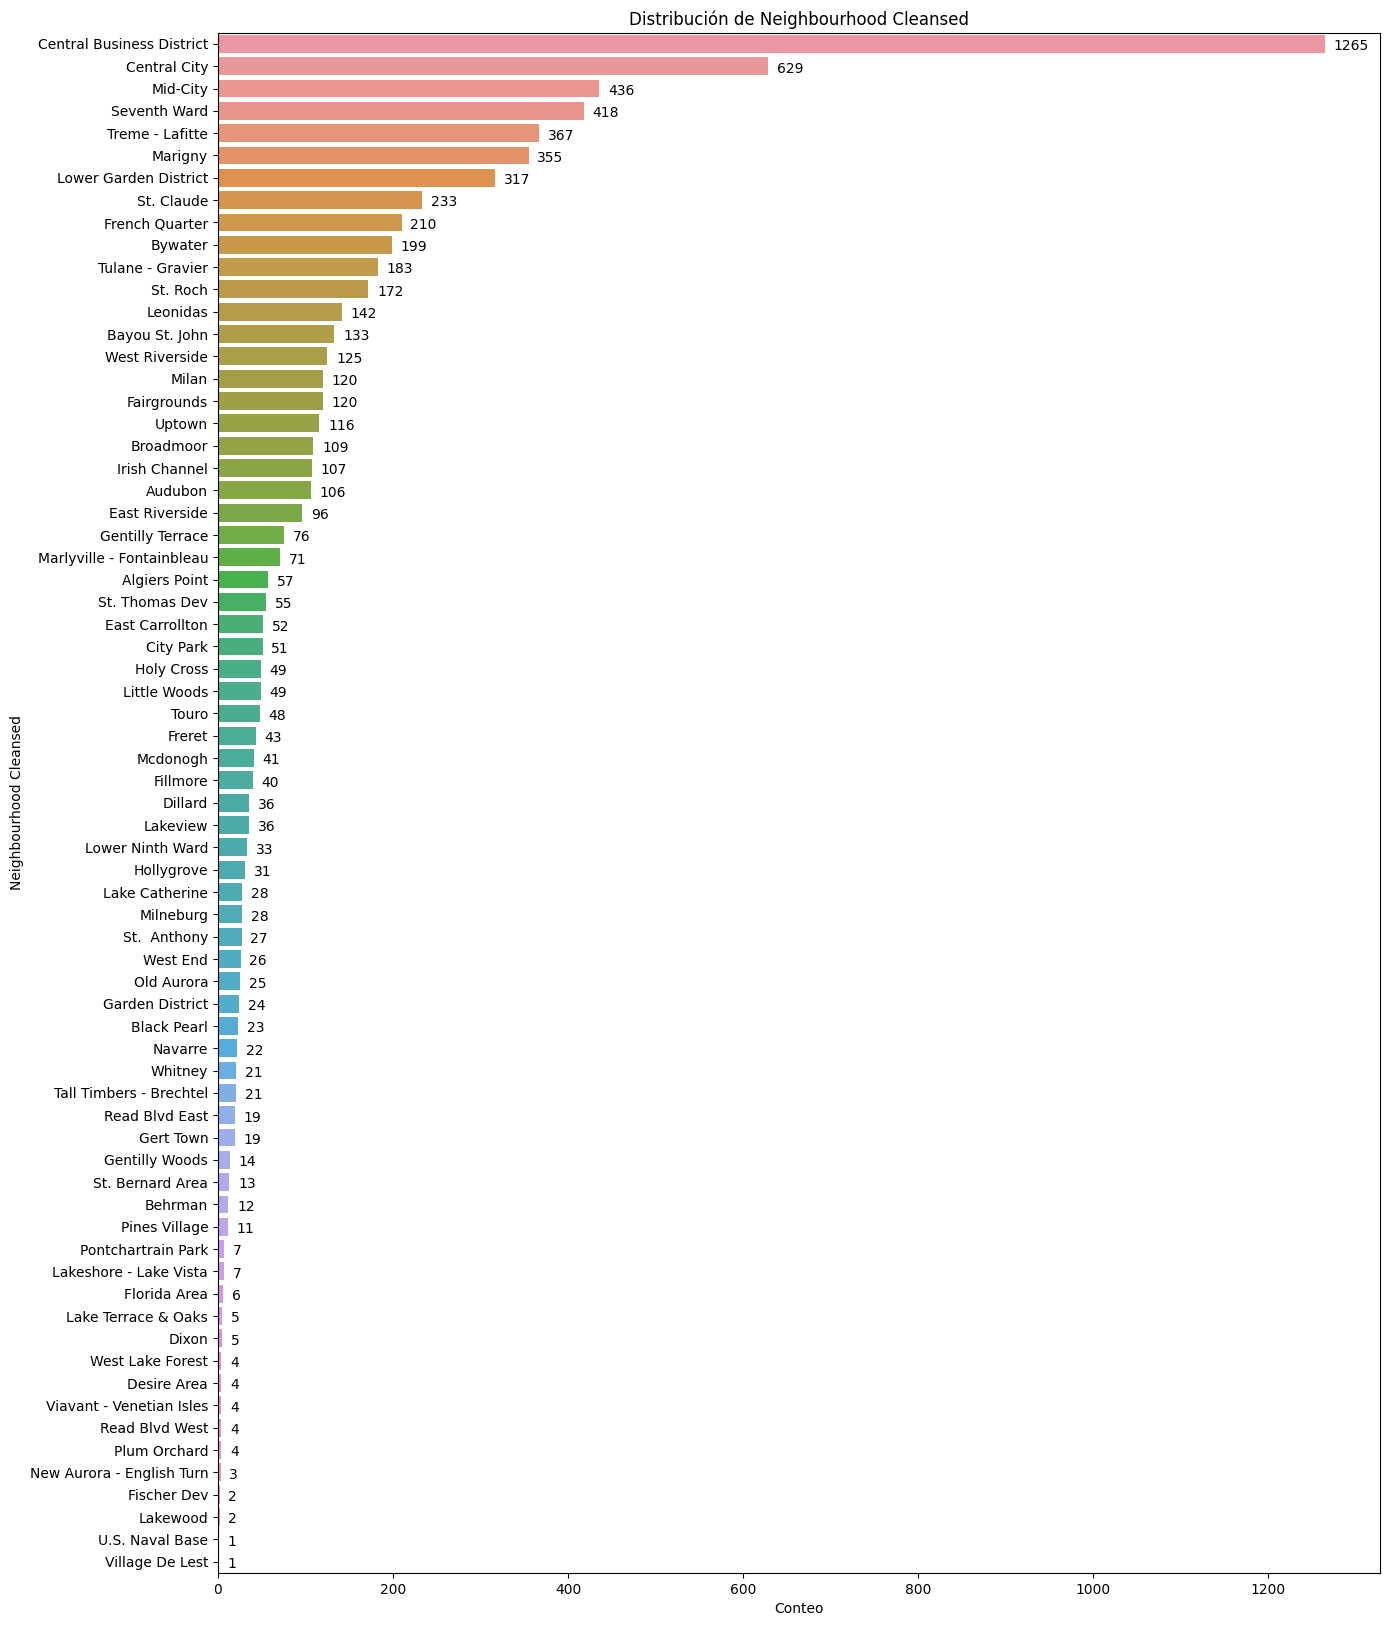

In [147]:
# Gráfico de barras para property_type con etiquetas de valores
plt.figure(figsize=(15, 20))
ax = sns.countplot(data=listings, y='neighbourhood_cleansed', order=listings['neighbourhood_cleansed'].value_counts().index)
plt.title('Distribución de Neighbourhood Cleansed')
plt.xlabel('Conteo')
plt.ylabel('Neighbourhood Cleansed')

# Agregar etiquetas de valores con números enteros
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width() + 10, p.get_y() + 0.5), ha='left', va='center')

plt.show()

In [148]:
# Anothe common strategy for working with datasets with high variability is filter the dataset by representative groups according to the context
# In this sense, let's work only with the neighbourhoods with more listings (pareto analysis)
neighbourhood_frec_cumsum = listings["neighbourhood_cleansed"].value_counts(normalize=True).cumsum()

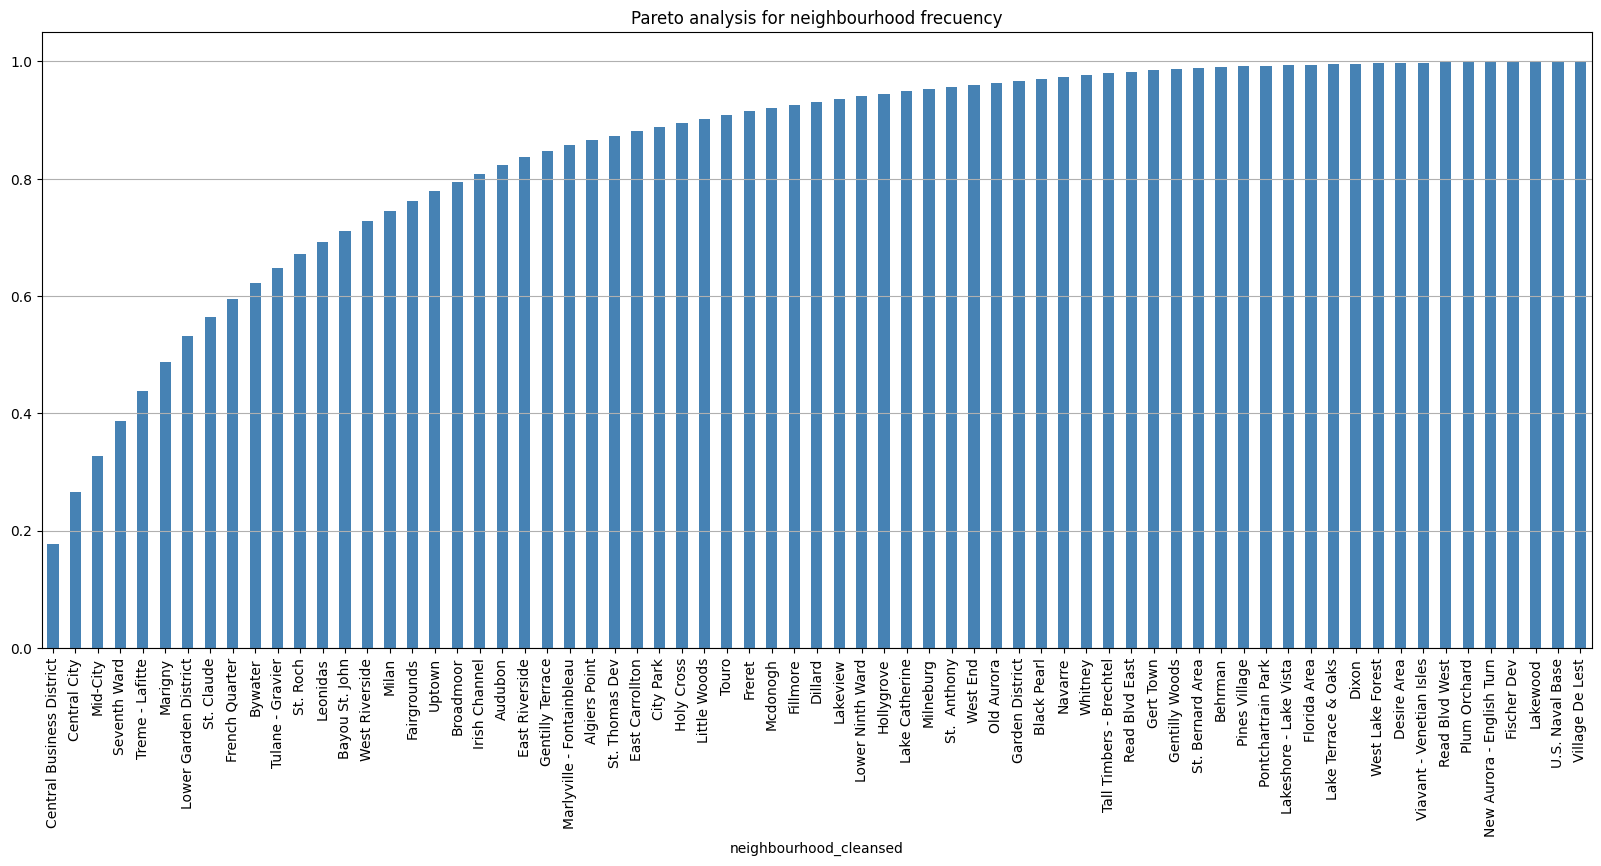

In [149]:
# Plotting pareto analysis for neighbourhood frecuency
plt.figure(figsize=(20, 8))
neighbourhood_frec_cumsum.plot(kind="bar", color="steelblue")
plt.title("Pareto analysis for neighbourhood frecuency")
plt.grid(axis="y")
plt.show()

**Análisis de Neighbourhood Cleansed**

Hay 69 barrios en el dataset de New Orleans, Louisiana, USA. 
1. Los barrios con mayor proporción de listados, como **Central Business District (17.77%)**, **Central City (8.83%)** y **Mid-City (6.12%)** indican que son los barrios más populares entre los anfitriones y probablemente los más demandados por los turistas.
2. Barrios como **Seventh Ward (5.87%)**, **Treme - Lafitte (5.15%)**, **Marigny (4.98%)** y **Lower Garden District (4.45%)** tienen una proporción significativa de lostados, lo que indica que estos lugares también son populares, pero no tanto como los primeros. Estas áreas pueden ser una buena opción para inversores que buscan oportunidades en barrios menos saturados a menor costo, pero con un buen potencial de ocupación.
3. Barrios como **Village De Lest (0.01%)**, **Fischer Dev (0.03%)** y **New Aurora - English Turn (0.04%)** tienen una representación muy baja. Estos barrios pueden ser menos atractivos para los turistas o tener menos oferta de alojamiento, lo que puede indicar una baja demanda o un mercado menos competitivo.

#### 2. Room Type

In [150]:
listings['room_type'].value_counts(dropna=False, normalize=True)

room_type
Entire home/apt    0.864147
Private room       0.118292
Hotel room         0.012784
Shared room        0.004777
Name: proportion, dtype: float64

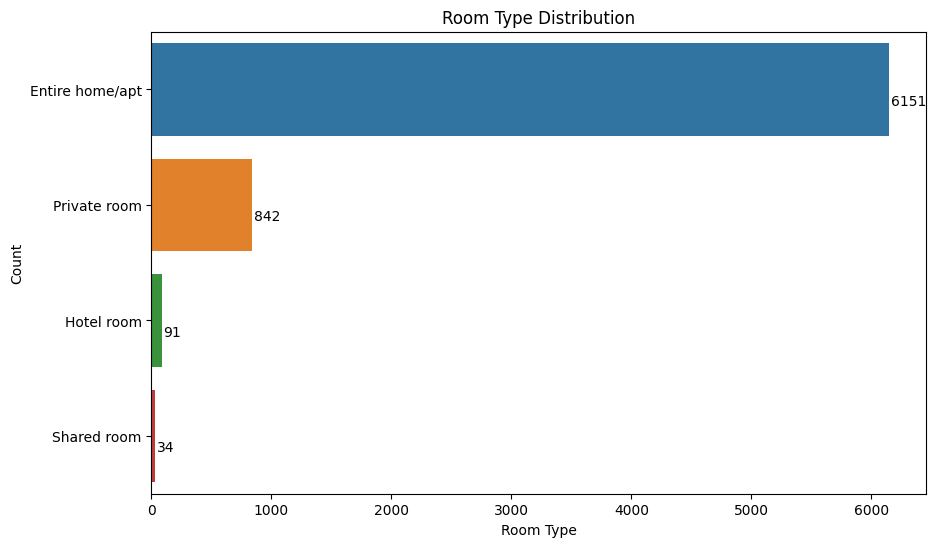

In [151]:
# PLOT ROOM TYPE DISTRIBUTION IN THE DATASET 
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=listings, y='room_type', order=listings['room_type'].value_counts().index)
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')

# Add value labels to the bars

for p in ax.patches:
    #ax = plt.gca()

    ax.annotate(f'{p.get_width():.0f}', (p.get_width() + 10, p.get_y() + 0.5), ha='left', va='center')

plt.show()


**Análisis de Room Type**
Hay 4 tipos de alojamiento en el dataset de New Orleans, Louisiana, USA.
1. La mayoría de propiedades listadas son **Entire home/apt (86.41%)**, lo que significa que los huéspedes prefieren tener una propiedad completa para ellos solos. Esto sugiere que, desde el punto de vista de la inversión, invertir en propiedades completas puede ser más rentable ya que son más demandadas.
2. Aunque representa una proporción menor, los **Private room (11.83%)** también son populares. Estos pueden ser una buena opción para los viajeros que buscan una experiencia más local y económica. Invertir en propiedades de este tipo puede ser una buena opción para atraer a este tipo de viajeros.
3. Los **Hotel room (1.28%)** y **Shared room (0.48%)** tienen una representación muy baja. Estos tipos de alojamiento pueden no ser tan populares entre los turistas o no ser tan rentables como los otros tipos. Invertir en propiedades de este tipo puede no ser tan rentable.

#### 3. Accommodates

In [152]:
listings["accommodates"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    7118.000000
mean        4.933127
std         2.964218
min         1.000000
5%          2.000000
25%         2.000000
50%         4.000000
75%         6.000000
95%        10.000000
max        16.000000
Name: accommodates, dtype: float64

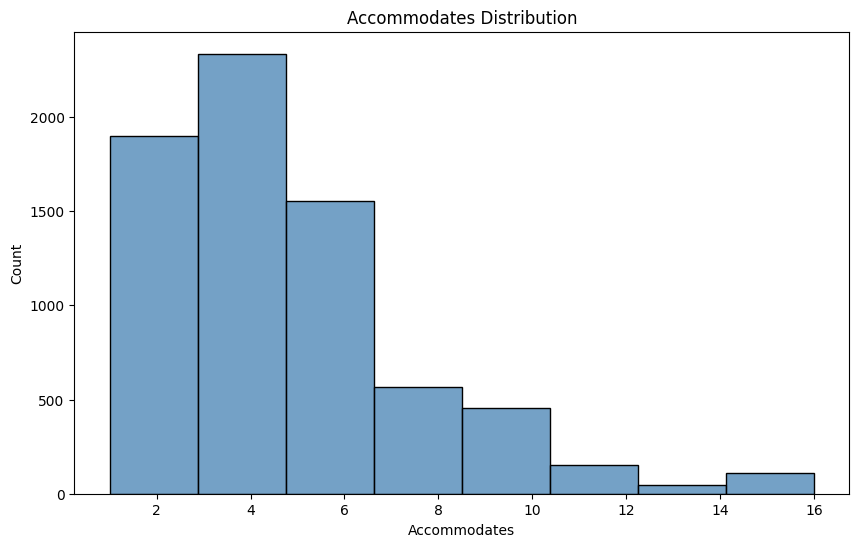

In [153]:
# PLOT ACCOMMODATES DISTRIBUTION IN THE DATASET
plt.figure(figsize=(10, 6))
sns.histplot(listings["accommodates"], bins=8, color="steelblue")
plt.title("Accommodates Distribution")
plt.xlabel("Accommodates")
plt.ylabel("Count")

plt.show()

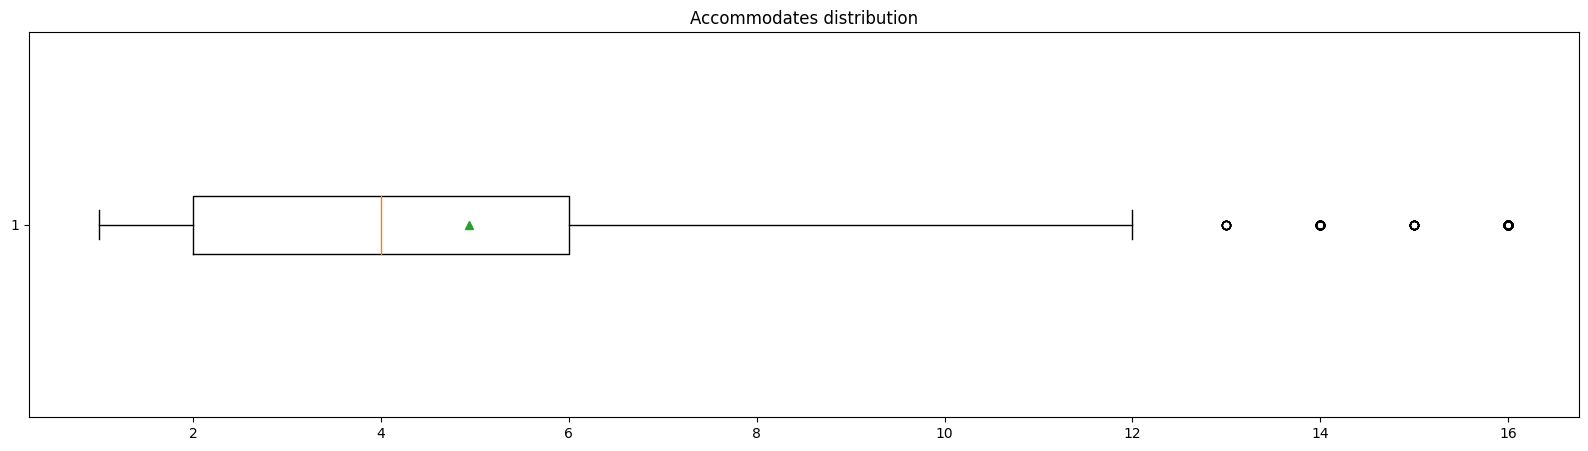

In [154]:
# Plotting a boxplot for number of reviews
plt.figure(figsize=(20, 5))
plt.boxplot(listings["accommodates"], showmeans=True, vert=False)
plt.title("Accommodates distribution")
plt.show()

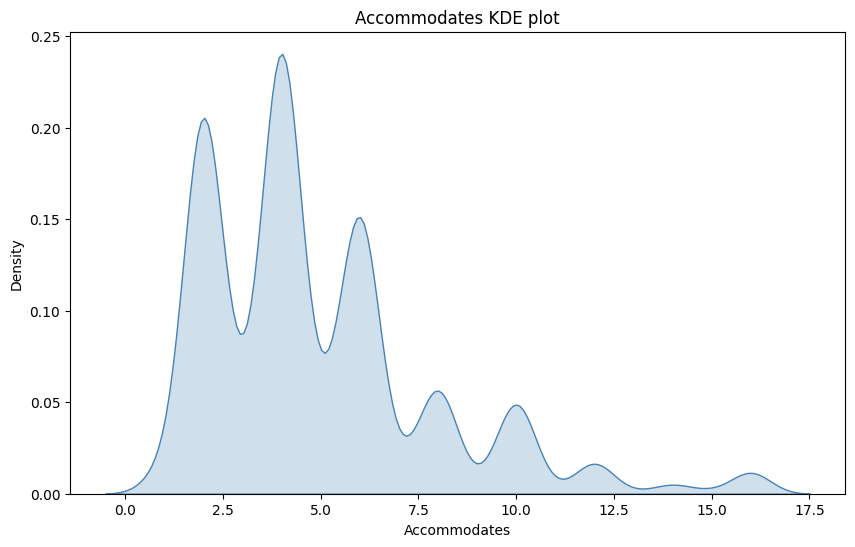

In [155]:
# kde plot for accommodates
plt.figure(figsize=(10, 6))
sns.kdeplot(data=listings, x="accommodates", color="steelblue", fill=True)
plt.title("Accommodates KDE plot")
plt.xlabel("Accommodates")
plt.ylabel("Density")
plt.show()

**Análisis de Accommodates**
La capacidad de alojamiento varía de 1 a 16 personas.
1. La capacidad promedio de las propiedades es de aproximadamente 4.93 personas, lo que indica que la mayoría de propiedades pueden alojar a grupos pequeños o familias (4 o 5 personas).
2. El valor mediano es 4 personas, lo que significa que el 50% de las propiedades pueden alojar hasta 4. Esto sugiere que las propiedades de capacidad media, adecuadas para familias o pequeños grupos, son las más comunes en el mercado.
3. El 25% de las propiedades pueden alojar hasta 2 personas, lo que sugiere que hay una cantidad significativa de propiedades para parejas o viajeros solos.
4. El 75% de las propiedades pueden alojar hasta 6 personas, lo que sugiere que hay una cantidad significativa de propiedades para grupos medianos.
5. Las propiedades más comunes son aquellas que pueden alohar entre 2 y 6 personas, lo que sugiere que los inversores podrían enfocarse en propiedades que puedan alojar a grupos pequeños o medianos, ya que representan la mayor parte del mercado. Por otro lado, las propiedades con capacidad para más de 10 personas son una minoría y pueden no ser tan rentables.

#### 4. Price

In [156]:
# We need to transform the price attribute from object to float
precio_limpio = pd.DataFrame()
precio_limpio["price"] = listings["price"].str.replace("[$,]", "", regex=True).astype(float)

In [157]:
precio_limpio["price"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count     5969.000000
mean       199.731781
std        455.512276
min         10.000000
5%          57.000000
25%         90.000000
50%        130.000000
75%        211.000000
95%        500.000000
max      28001.000000
Name: price, dtype: float64

[]

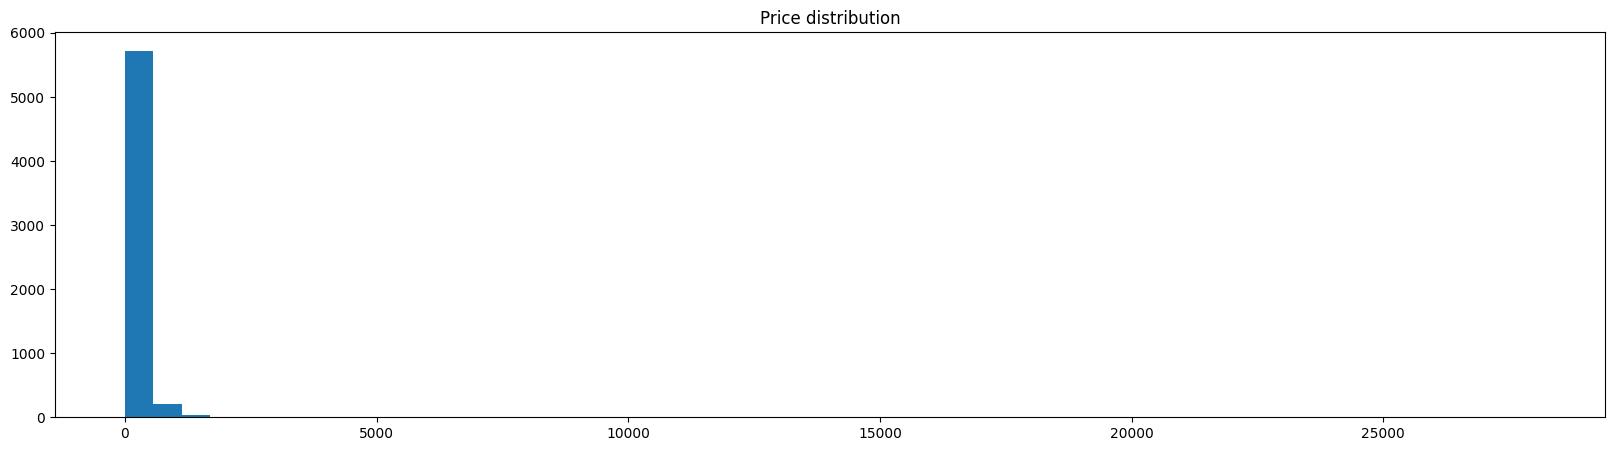

In [158]:
# Plotting a histogram for price
plt.figure(figsize=(20, 5))
plt.hist(precio_limpio["price"], bins=50)
plt.title("Price distribution")
plt.plot()

In [159]:
# Let's make some calculations for determining an outlier threshold
q1 = precio_limpio["price"].quantile(0.25)
q3 = precio_limpio["price"].quantile(0.75)
iqr = q3 - q1

[]

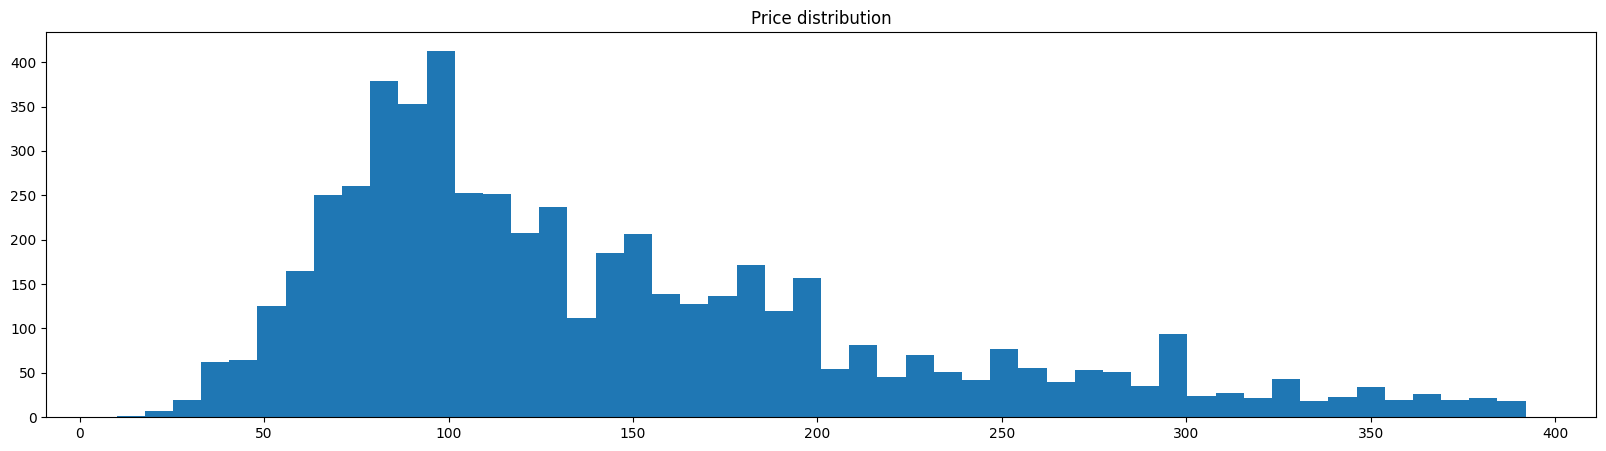

In [160]:
plt.figure(figsize=(20, 5))
plt.hist(precio_limpio.loc[precio_limpio["price"] <= (q3 + 1.5 * iqr)]["price"], bins=50)
plt.title("Price distribution")
plt.plot()

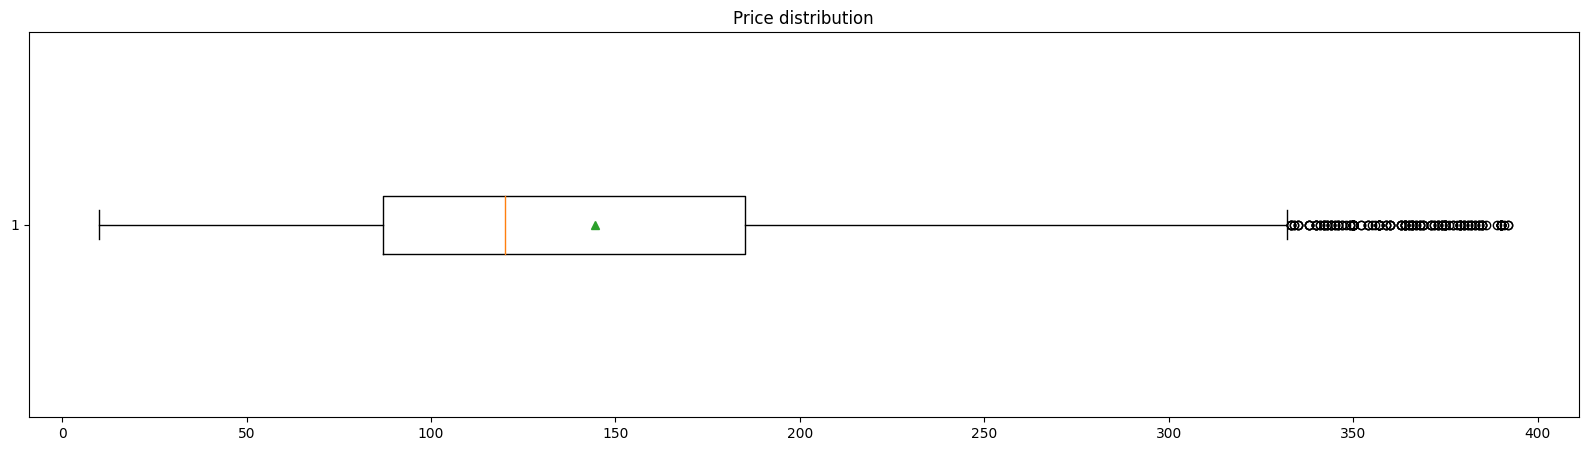

In [161]:
# Plotting a boxplot for price
plt.figure(figsize=(20, 5))
plt.boxplot(precio_limpio.loc[precio_limpio["price"] <= (q3 + 1.5 * iqr)]["price"], showmeans=True, vert=False)
plt.title("Price distribution")
plt.show()


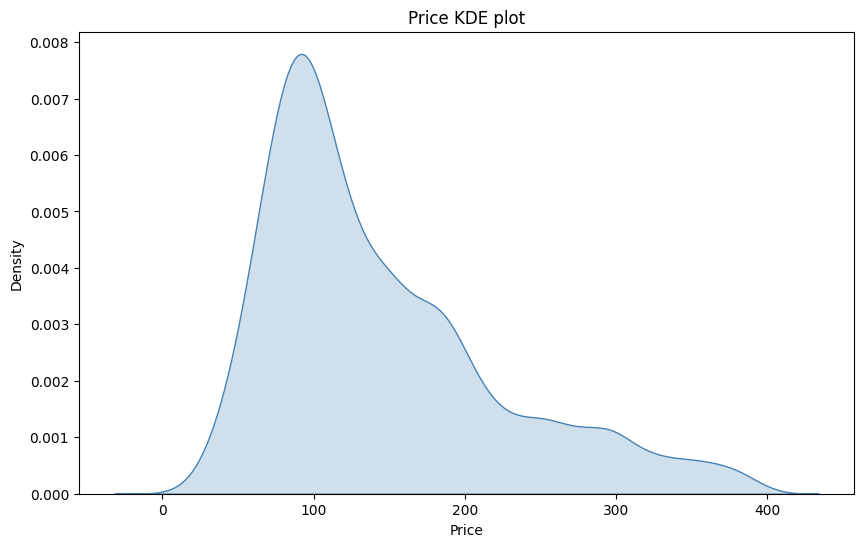

In [165]:
# kdplot for price
plt.figure(figsize=(10, 6))
sns.kdeplot(data=precio_limpio.loc[precio_limpio["price"] <= (q3 + 1.5 * iqr)], x="price", color="steelblue", fill=True)
plt.title("Price KDE plot")
plt.xlabel("Price")
plt.ylabel("Density")
plt.show()


**Análisis de Price**

El precio de las propiedades varía de 10 a 28001 dólares.
1. El precio promedio de las propiedades es de aproximadamente 199.73 dólares, lo que indica que la mayoría de propiedades tienen precios relativamente altos; sin embargo, la desviación estándar es alta (455.51), lo que sugiere que hay una gran variabilidad en los precios, lo que sesga la media. Como la desviación estándar sugiere que existe una amplia variación en los precios, es importante ver por qué factores pueden estar influenciados (por ejemplo, por la ubicación, el tipo de alojamiento, la capacidad, etc.).
2. El valor mediano es de 130 dólares, lo que significa que el 50% de las propiedades tienen un precio de hasta 130 dólares. Esto sugiere que la mayoría de propiedades tienen precios relativamente bajos.
3. El 25% de las propiedades tienen un precio de hasta 90 dólares, lo que sugiere que hay una cantidad significativa de propiedades económicas disponibles (relevante para viajeros de bajo presupuesto).
4. El 75% de las propiedades tienen un precio de hasta 211 dólares, lo que sugiere que hay una cantidad significativa de propiedades de precio moderado.
5. Las propiedades más comunes tienen precios entre 90 y 211 dólares, lo que sugiere que los inversores podrían enfocarse en propiedades de precio moderado, ya que representan la mayor parte del mercado. Por otro lado, las propiedades con precios muy altos (más de 500 dólares) son una minoría y pueden no ser tan rentables.

#### 5. Availability 365

In [166]:
listings["availability_365"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    7118.000000
mean      189.340545
std       123.779741
min         0.000000
5%          0.000000
25%        84.000000
50%       186.000000
75%       308.000000
95%       363.000000
max       365.000000
Name: availability_365, dtype: float64

[]

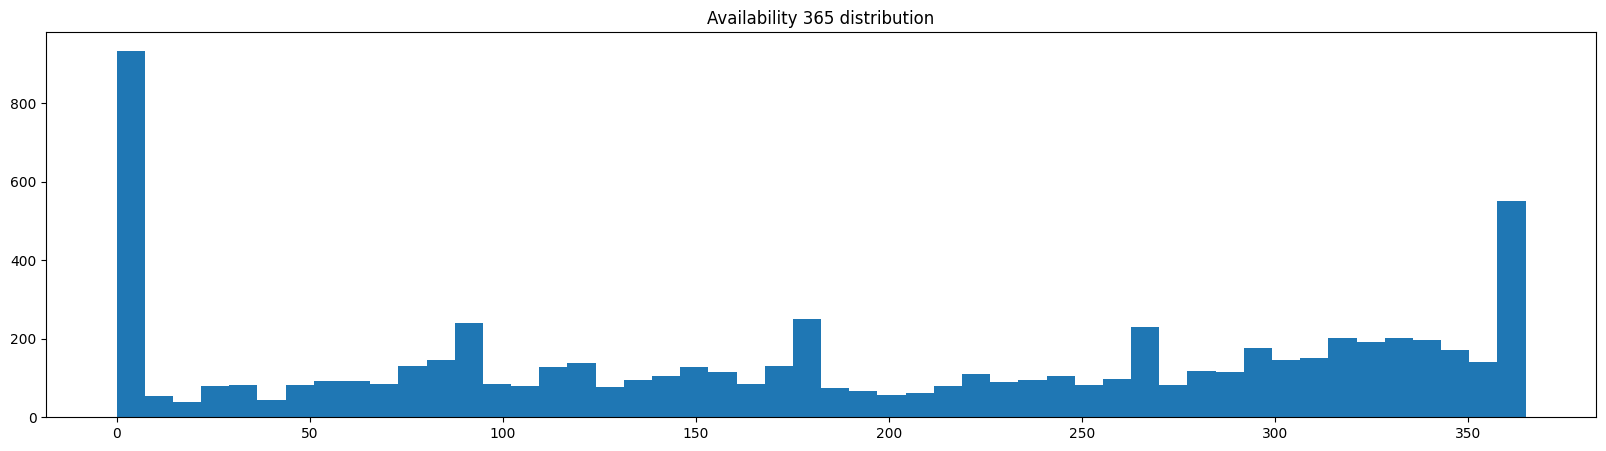

In [167]:
# histogram for availability_365
plt.figure(figsize=(20, 5))
plt.hist(listings["availability_365"], bins=50)
plt.title("Availability 365 distribution")
plt.plot()


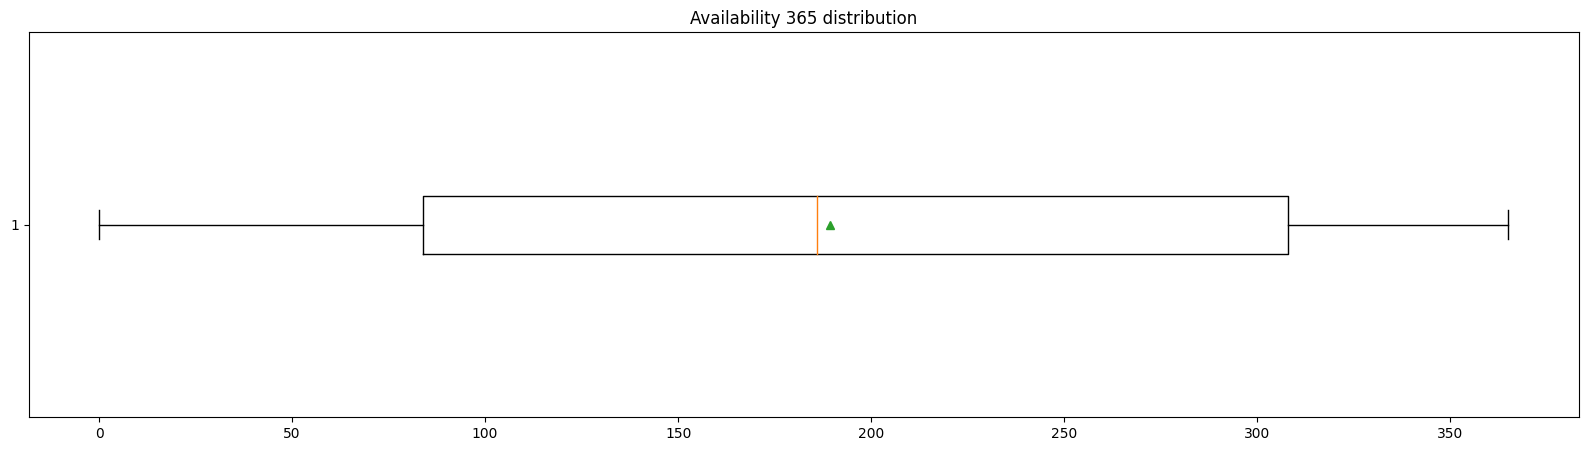

In [168]:
# Plotting a boxplot for availability_365
plt.figure(figsize=(20, 5))
plt.boxplot(listings["availability_365"], showmeans=True, vert=False)
plt.title("Availability 365 distribution")
plt.show()


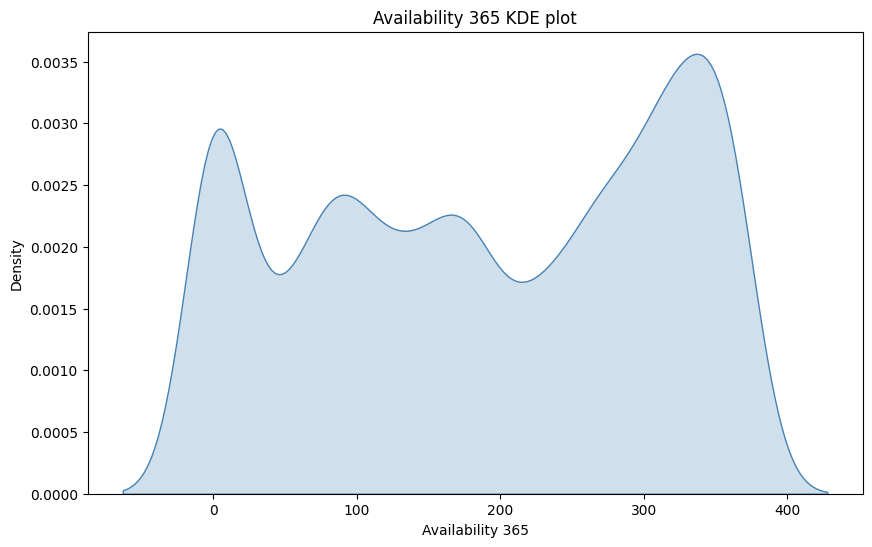

In [169]:
# kde plot for availability_365
plt.figure(figsize=(10, 6))
sns.kdeplot(data=listings, x="availability_365", color="steelblue", fill=True)
plt.title("Availability 365 KDE plot")
plt.xlabel("Availability 365")
plt.ylabel("Density")
plt.show()

**Análisis de Availability 365**

La disponibilidad de las propiedades varía de 0 a 365 días.
1. La disponibilidad promedio de las propiedades es de 189.34 días, lo que indica, en promedio, que las propiedades están disponibles aproximadamente la mitad del año. 
2. La desviación estándar es de 123.78 días, lo que sugiere que hay una gran variabilidad en la disponibilidad de las propiedades. Esto puede deberse a factores como la demanda, la gestión de la propiedad, la ubicación, etc.
3. El valor mediano es de 186 días, lo que significa que el 50% de las propiedades están disponibles hasta 180 días y el otro 50% tiene más disponibilidad. Esto sugiere que la mayoría de propiedades tienen una disponibilidad relativamente alta.
4. El 25% de las propiedades tienen una disponibilidad de hasta 84 días, lo que sugiere que hay una cantidad significativa de propiedades con baja disponibilidad. Esto puede deberse a una alta demanda, precios competitivo, una buena gestión de la propiedad o los propietarios restringen las reservas.
5. El 75% de las propiedades tienen una disponibilidad de hasta 308 días, lo que sugiere que hay una cantidad significativa de propiedades con alta disponibilidad. Esto puede deberse a una baja demanda, precios no competitivos, mala gestión de la propiedad o propietarios que permiten reservas con mucha antelación.
6. Propiedades que están disponibles entre 308 y 365 días probablemente están menos reservadas y podrían tener dificultades para atrear huéspedes o estar situadas en áreas de menor demanda. Mientras que propiedades con 84 días o menos de disponibilidad están probablemente en zonas de alta demanda o son altamente competitivas. Estas propiedades pueden representar inversione sexitosas, ya que la alta ocupación puede traducirse en mayores ingresos.

## 3. Estrategia de análisis

La estrategia de análisis se centrará en identificar las mejores opciones de inversión en propiedades de alquiler vacacional en New Orleans, Louisiana, USA. Para ello, se analizarán las variables seleccionadas en el punto anterior combinando estadísticos descriptivos, visualización de datos y pruebas estadísticas que permitan validar patrones y relaciones entre las variables. De manera que los inversores puedan tomar decisiones informadas.

1. **Estadísticos descriptivos:** Se comenzará con el cálculo de medidas centrales (media, mediana) y de dispersión (desviación estándar, percentiles) para explorar la distribución de las variables cuantitativas y tener una idea general de los datos. Por otro lado, se calcularán las frecuencias y proporciones para las variables categóricas.
2. **Pruebas estadísticas:** 
    - Prueba de correlación (Pearson): Se realizará una prueba de correlación entre las variables cuantitativas para identificar posibles relaciones lineales entre ellas. Esto permitirá identificar si el aumento en la capacidad o disponibilidad de una propiedad está asociado con un incremento en el precio.
    - T-test o Z-test: Se realizará una prueba de hipótesis para comparar los precios promedio de diferentes tipos de alojamiento o barrios. Esto permitirá identificar si hay diferencias significativas en los precios entre diferentes tipos de alojamiento o barrios. 
    - Chi-cuadrado: Se realizará una prueba de independencia entre las variables categóricas para identificar si la ubicación de la propiedad influye en el tipo de alojamiento o la capacidad. Esto permitirá identificar si hay una relación significativa entre estas variables.
3. **Análisis geoespacial y de agrupamiento:** usando `neighbourhood_cleansed`, se hará un análisis geoespacial para identificar zonas con alta rentabilidad. Se agruparán los barrios en función del precio y ocupación. Esto permitirá identificar los barrios más rentables y atractivos para invertir.
4. **Visualización de datos:** Se utilizarán gráficos de dispersión, mapas de calor y gráficos de correlación para visualizar la distribución de las variables cuantitativas y detectar posibles outliers, patrones o relaciones entre ellas. También se usarán gráficos de barras para explorar la proporción de `room_type` en distintos barrios.

Todo lo anterior permitirá identificar las mejores opciones de inversión en propiedades de alquiler vacacional en New Orleans, Louisiana, USA, basadas en la ubicación, tipo de alojamiento, capacidad, precio y disponibilidad, de manera que los inversores puedan tomar decisiones indoformadas y maximizar su rentabilidad.

## 4. Desarrollo de la estrategia

### Carga y procesamiento inicial de los datos

In [197]:
df = pd.read_csv("listings.csv")

In [198]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,970324090541593163,https://www.airbnb.com/rooms/970324090541593163,20240905175050,2024-09-05,city scrape,Comfort in Bywater,"Kick back and relax in this calm, stylish spac...",Bywater is one of New Orleans' most delightful...,https://a0.muscache.com/pictures/miso/Hosting-...,56212513,https://www.airbnb.com/users/show/56212513,Amanda,2016-01-26,"Portland, OR",NaN,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/244b3...,https://a0.muscache.com/im/pictures/user/244b3...,St. Claude,1,1,"['email', 'phone']",t,t,Neighborhood highlights,St. Claude,NaN,29.966211,-90.041057,Entire home,Entire home/apt,4,1.0,1 bath,2.0,2.0,"[""Carbon monoxide alarm"", ""Central heating"", ""...",$83.00,30,365,30.0,30.0,365.0,365.0,30.0,365.0,NaN,t,0,0,0,82,2024-09-05,3,3,0,2024-02-01,2024-05-06,5.00,5.0,5.00,5.00,5.00,5.00,5.0,NaN,f,1,1,0,0,0.41
1,768293169006662066,https://www.airbnb.com/rooms/768293169006662066,20240905175050,2024-09-05,city scrape,Cozy and Comfortable,NaN,"Lots of restaurants, bars, and music within wa...",https://a0.muscache.com/pictures/miso/Hosting-...,136665450,https://www.airbnb.com/users/show/136665450,Joshua,2017-06-23,"New Orleans, LA",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/bbc83...,https://a0.muscache.com/im/pictures/user/bbc83...,St. Claude,1,1,"['email', 'phone']",t,t,Neighborhood highlights,St. Claude,NaN,29.972380,-90.042320,Private room in home,Private room,4,2.0,2 baths,2.0,2.0,"[""TV"", ""Wifi"", ""Carbon monoxide alarm"", ""Kitch...",$180.00,30,90,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,NaN,30,60,90,365,2024-09-05,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
2,1069600842896440330,https://www.airbnb.com/rooms/1069600842896440330,20240905175050,2024-09-05,city scrape,"Tons of Space,10 Beds,3 1/2 Bath",Beautiful apartment with plenty of space! Five...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,556686789,https://www.airbnb.com/users/show/556686789,Joe,2024-01-15,NaN,NaN,within an hour,90%,75%,f,https://a0.muscache.com/im/pictures/user/7f605...,https://a0.muscache.com/im/pictures/user/7f605...,Algiers,1,1,"['email', 'phone']",t,t,NaN,Algiers Point,NaN,29.953003,-90.050669,Entire rental unit,Entire home/apt,12,3.5,3.5 baths,5.0,10.0,"[""Carbon monoxide alarm"", ""Central heating"", ""...",$638.00,1,365,1.0,2.0,365.0,365.0,1.3,365.0,NaN,t,19,46,76,111,2024-09-05,3,3,0,2024-02-18,2024-07-06,5.00,5.0,5.00,5.00,5.00,5.00,5.0,"23rstr-02500, 23ostr-01343",f,1,1,0,0,0.45
3,23588926,https://www.airbnb.com/rooms/23588926,20240905175050,2024-09-05,city scrape,Superdome Lux Home,Awesome location!!<br />5 minute drive from th...,Quiet friendly block.,https://a0.muscach

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7118 entries, 0 to 7117
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7118 non-null   int64  
 1   listing_url                                   7118 non-null   object 
 2   scrape_id                                     7118 non-null   int64  
 3   last_scraped                                  7118 non-null   object 
 4   source                                        7118 non-null   object 
 5   name                                          7118 non-null   object 
 6   description                                   6996 non-null   object 
 7   neighborhood_overview                         4616 non-null   object 
 8   picture_url                                   7118 non-null   object 
 9   host_id                                       7118 non-null   i

In [200]:
# Mirar si hay duplicados
df.duplicated().sum()

0

In [201]:
# Convertir 'price' a un valor numérico (eliminar símbolo $ y comas)
df['price'] = df['price'].str.replace('[$,]', '', regex=True).astype(float)

In [202]:
# Se toman únicamente las  variables que se consideran relevantes
df = df[["neighbourhood_cleansed", "room_type", "accommodates", "price", "availability_365"]]

In [203]:
# Verificamos si hay valores faltantes
df.isnull().sum()

neighbourhood_cleansed       0
room_type                    0
accommodates                 0
price                     1149
availability_365             0
dtype: int64

In [204]:
# Eliminar filas con valores faltantes
df = df.dropna(subset=["price"])

Como ya se había observado en el punto 2, la variable `price` tiene outliers extremos lo que hace que las visualizaciones y análisis de correlación no sean claros. Por lo tanto, se procederá a eliminar los outliers de la variable `price` para mejorar la calidad del análisis.

In [205]:
q1 = precio_limpio["price"].quantile(0.25)
q3 = precio_limpio["price"].quantile(0.75)
iqr = q3 - q1

df = df[df["price"] <= (q3 + 1.5 * iqr)]

Por otro lado, como hemos visto, hay muchos barrios, por lo que se procederá solo a tomar los barrios que cubren el 80% de los listados, es decir, los barrios más populares.

In [222]:
# Tomar los datos con solo los barrios que cubran el 80% de los datos
neighbourhood_frec_cumsum = df["neighbourhood_cleansed"].value_counts(normalize=True).cumsum()
neighbourhood_frec_cumsum

neighbourhoods_to_keep = list(neighbourhood_frec_cumsum[neighbourhood_frec_cumsum <= 0.8].index)
df = df[df["neighbourhood_cleansed"].isin(neighbourhoods_to_keep)]

### Análisis Descriptivo

       accommodates        price  availability_365
count   4335.000000  4335.000000       4335.000000
mean       4.661361   145.565398        217.313264
std        2.595872    78.274332        107.413184
min        1.000000    20.000000          0.000000
5%         2.000000    57.000000         41.700000
25%        2.000000    88.000000        121.000000
50%        4.000000   121.000000        229.000000
75%        6.000000   185.000000        318.000000
95%       10.000000   309.000000        363.000000
max       16.000000   392.000000        365.000000


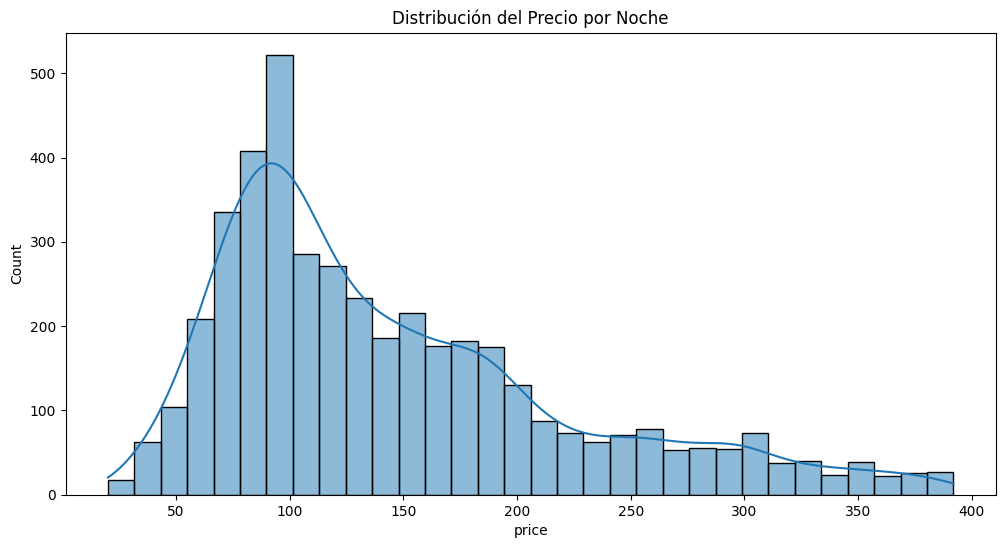

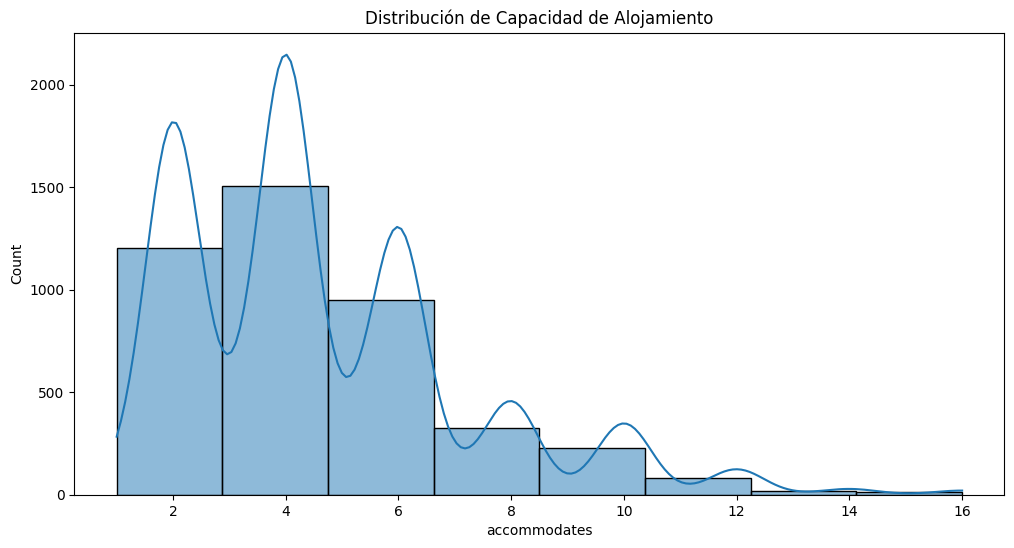

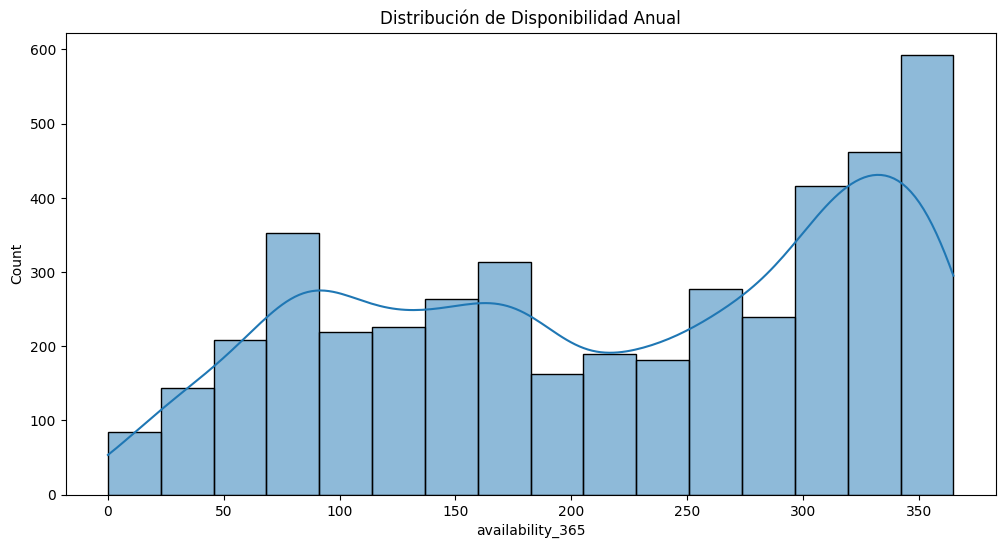

In [223]:
# Estadísticos descriptivos
print(df.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]))

# Distribuciones de las variables numéricas
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribución del Precio por Noche')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['accommodates'], kde=True, bins=8)
plt.title('Distribución de Capacidad de Alojamiento')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df['availability_365'], kde=True)
plt.title('Distribución de Disponibilidad Anual')
plt.show()


**Accommodates**

La capacidad de alojamiento varía de 1 a 16 personas. El número de personas que pueden alojarse en una propiedad tiene una media de 4.66. La mayoría de las propiedades tienen una capacidad de entre 2 y 6 personas, lo cual es típico para apartamentos y casas pequeñas. 

**Price**

El precio de las propiedades varía de 10 a 28001 dólares. El precio promedio de las propiedades es de aproximadamente 145.57 dólares, con una variabilidad bastante alta (std de 78.27). El precio mediano es de 121 dólares, lo que significa que el 50% de las propiedades tienen un precio de hasta 121 dólares. La mayoría de propiedades tienen precios entre 88 y 185 dólares, lo que sugiere que los inversores podrían enfocarse en propiedades de precio moderado.

**Availability 365**

La disponibilidad media anual es de 217 días, lo que sugiere que la mayoría de propiedades están disponibles la mayor parte del año. La disponibilidad mediana es de 229 días, lo que significa que el 50% de las propiedades tienen una disponibilidad de hasta 229 días. La mayoría de propiedades tienen una disponibilidad de entre 121 y 318 días, lo que sugiere que la mayoría de propiedades están disponibles la mayor parte del año.

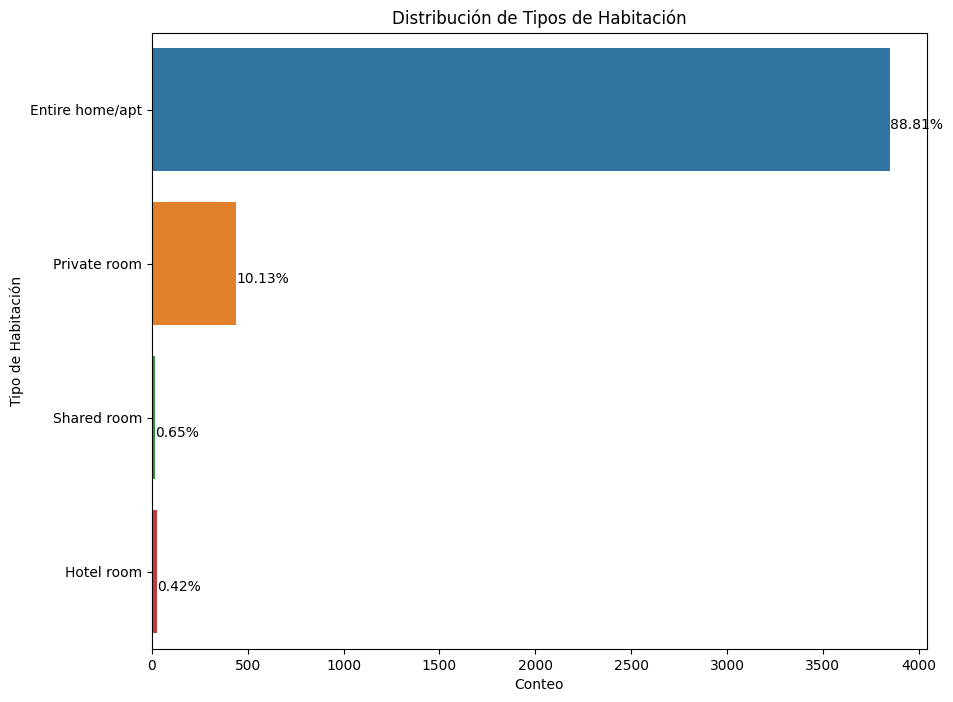

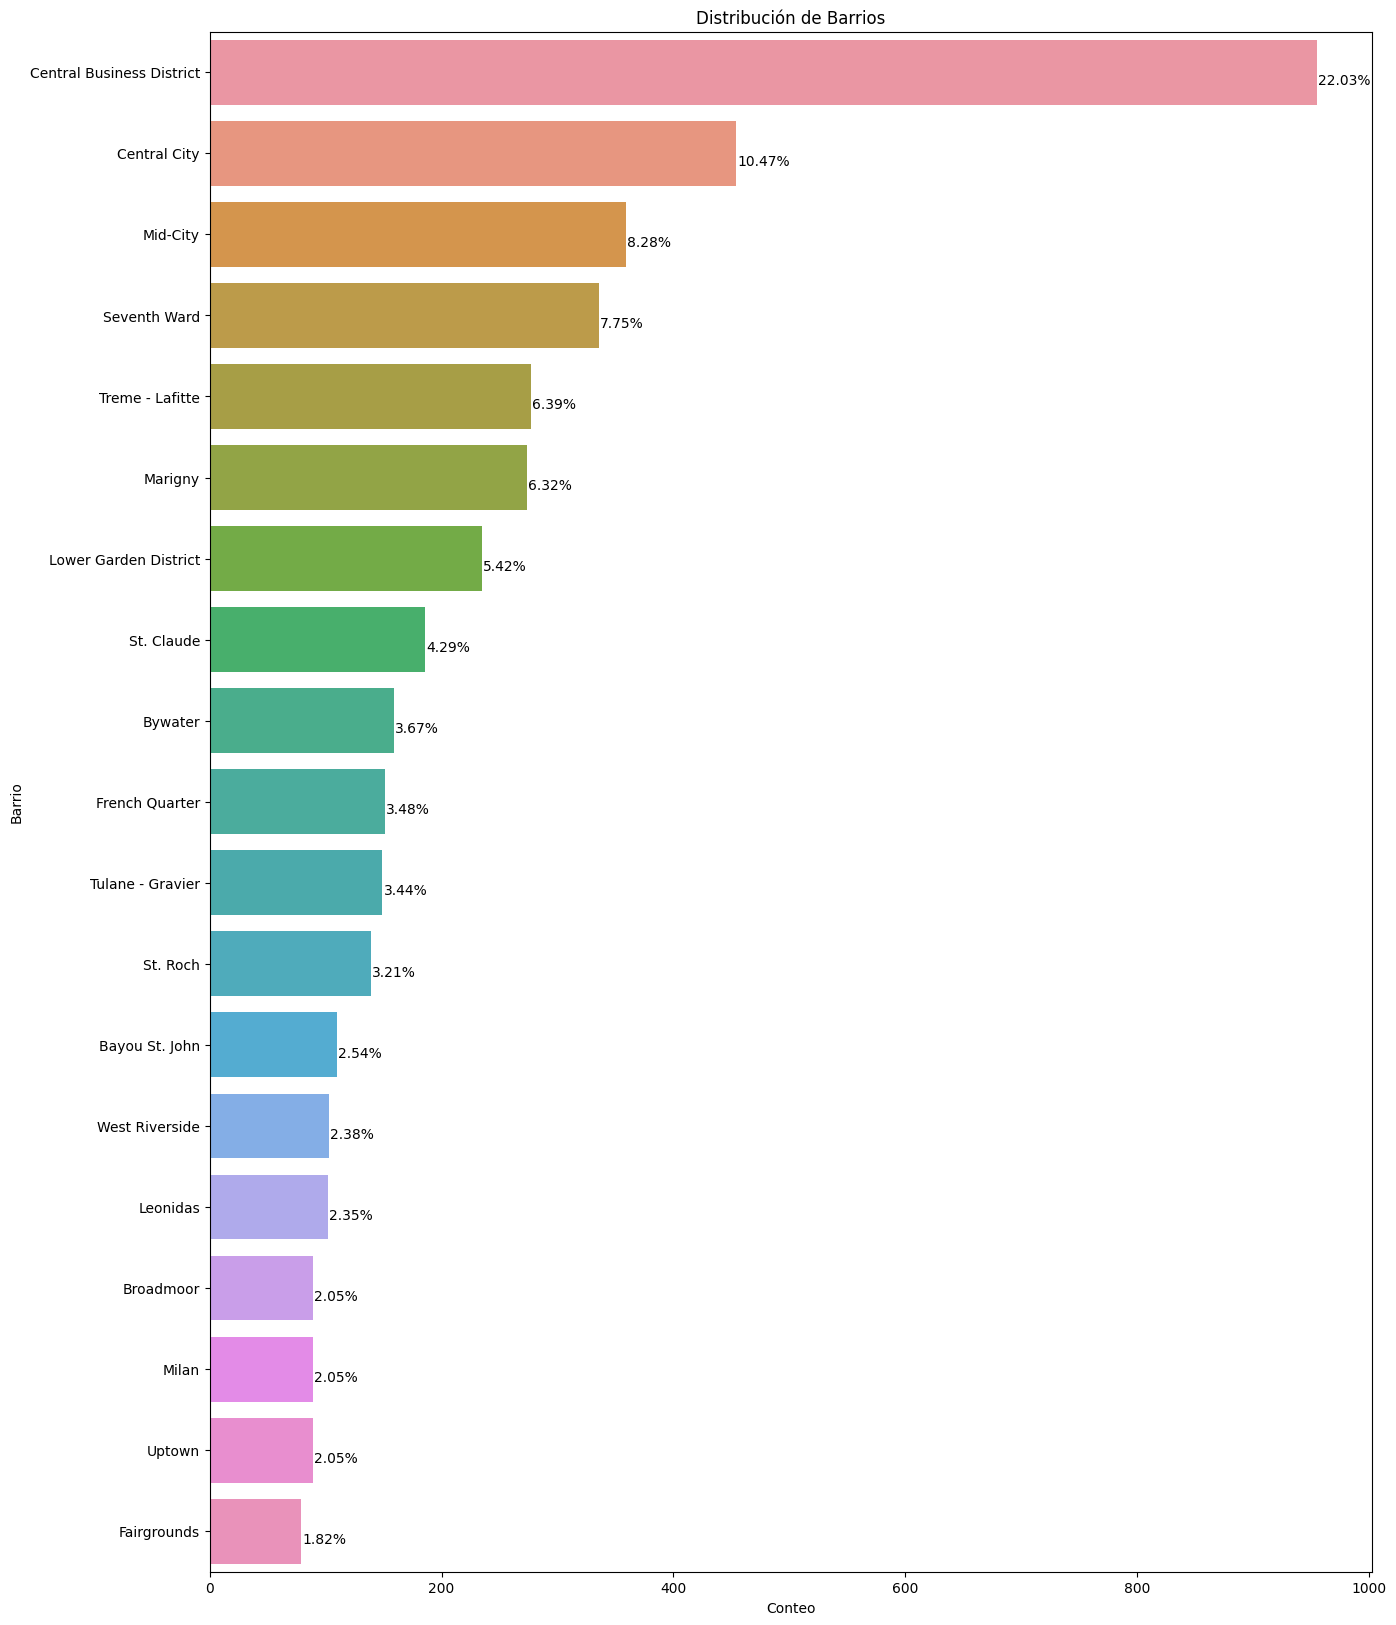

In [224]:
# Distribución de la variable categórica 'room_type'
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df, y='room_type')
plt.title('Distribución de Tipos de Habitación')
plt.xlabel('Conteo')
plt.ylabel('Tipo de Habitación')

# Calcular los porcentajes
total = len(df['room_type'])
room_type_counts = df['room_type'].value_counts()
percentages = room_type_counts / total * 100

# Agregar etiquetas de porcentaje
for p, percentage in zip(ax.patches, percentages):
    ax.annotate(f'{percentage:.2f}%', (p.get_width() + 1, p.get_y() + 0.5), ha='left', va='center')


plt.show()


# Distribución de la variable categórica 'neighbourhood_cleansed'
plt.figure(figsize=(15, 20))
ax = sns.countplot(data=df, y='neighbourhood_cleansed', order=df['neighbourhood_cleansed'].value_counts().index)
plt.title('Distribución de Barrios')
plt.xlabel('Conteo')
plt.ylabel('Barrio')

# Calcular los porcentajes
total = len(df)
neighbourhood_cleansed_counts = df['neighbourhood_cleansed'].value_counts()
percentages = neighbourhood_cleansed_counts / total * 100

# Agregar etiquetas de porcentaje
for p, percentage in zip(ax.patches, percentages):
    ax.annotate(f'{percentage:.2f}%', (p.get_width() + 1, p.get_y() + 0.5), ha='left', va='center')

plt.show()

**Neighbourhood Cleansed**
 
Los barrios **Central Business District** y **Central City** concentran más del 32% de las propiedades, lo que indica que estos son los principales centros de oferta. Además, barrios como **Mid-City** y **Seventh Ward** también tienen una proporción significativa de listados, lo que sugiere que son áreas populares para los turistas.

**Room Type**

El 88.81% de las propiedades son de tipo **Entire home/apt**, lo que indica que los huéspedes prefieren tener una propiedad completa para ellos solos. Por otro lado, los tipos **Private room** (10.13%) también representan una proporción significativa, aunque mucho menor.

### Pruebas estadísticas

#### Correlación

                     price  accommodates  availability_365
price             1.000000      0.569700          0.085574
accommodates      0.569700      1.000000          0.167572
availability_365  0.085574      0.167572          1.000000


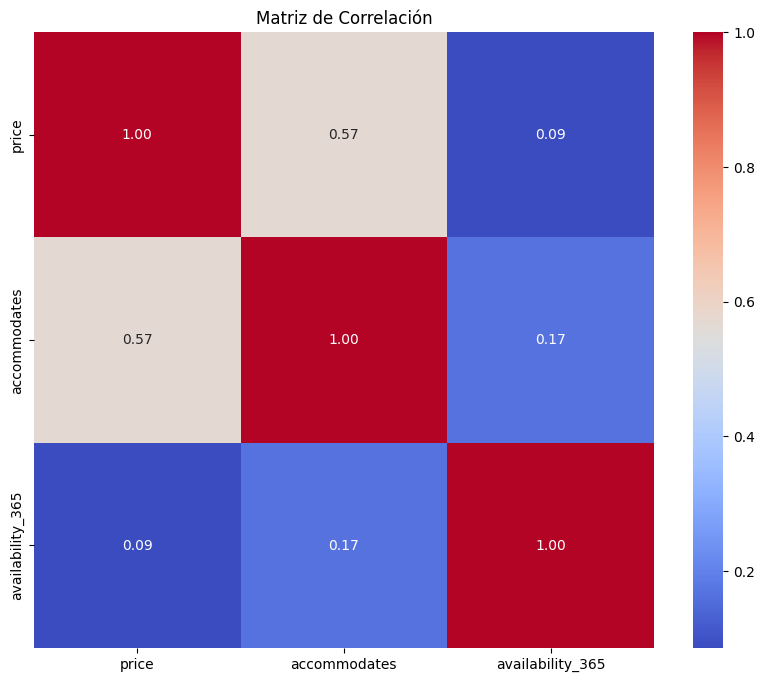

In [226]:
# Explorar relación entre price, accommodates y availability_365 con prueba de correlación y visualizamos la matriz de correlación
correlation = df[["price", "accommodates", "availability_365"]].corr()
print(correlation)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Matriz de Correlación')
plt.show()


Existe una correlación moderada entre `accommodates` y `price` (0.57), lo que sugiere que el aumento en la capacidad de la propiedad está asociado con un aumento en el precio. Esto tiene sentido, ya que propiedades más grandes suelen tener precios más altos.

La correlación entre `availability_365` y otras variables es muy baja (menos de 0.1), lo que sugiere que la disponibilidad depende de factores externos más allá del precio o la capacidad de la propiedad.

#### T-test

In [227]:
# Filtramos las propiedades por topo de habitación, solo tomamos 'Entire home/apt' y 'Private room' para el análisis, 
# ya que son los más comunes

df_entire_home = df[df['room_type'] == 'Entire home/apt']
df_private_room = df[df['room_type'] == 'Private room']

# Realizar T-test
t_stat, p_value = ttest_ind(df_entire_home['price'], df_private_room['price'], equal_var=False)
print(f"T-stat: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Diferencia significativa en precios entre Entire home/apt y Private room")
else:
    print("No hay diferencia significativa en precios entre Entire home/apt y Private room")


T-stat: 9.234298982641024, P-value: 4.978713894575658e-19
Diferencia significativa en precios entre Entire home/apt y Private room


Al existir una diferencia significativa en los precios entre las propiedades de tipo `Entire home/apt` y `Private room`, se confirma que las propiedades completas tienden a ser considerablemente más caras que las habitaciones privadas, lo que sugiere que los huéspedes están dispuestos a pagar más por la privacidad y comodidad de una propiedad completa.

#### Chi-cuadrado

In [228]:
# Chi cuadrado para la relación entre 'room_type' y 'neighbourhood_cleansed'
contingency_table = pd.crosstab(df['room_type'], df['neighbourhood_cleansed'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi2}, P-value: {p_value}")

if p_value < 0.05:
    print("Existe una asociación significativa entre 'room_type' y 'neighbourhood_cleansed'")
else:
    print("No hay asociación significativa entre 'room_type' y 'neighbourhood_cleansed'")

Chi2: 724.8514235395212, P-value: 3.688238218416037e-118
Existe una asociación significativa entre 'room_type' y 'neighbourhood_cleansed'


El test de chi-cuadrado sugirió que hay una asociación significativa entre el tipo de propiedad y el barrio, lo que sugiere que ciertos barrios están más asociados a ciertos tipos de propiedades, lo que puede ser útil para los inversores a la hora de elegir la ubicación de su propiedad.

### Análisis Geoespacial por barrios

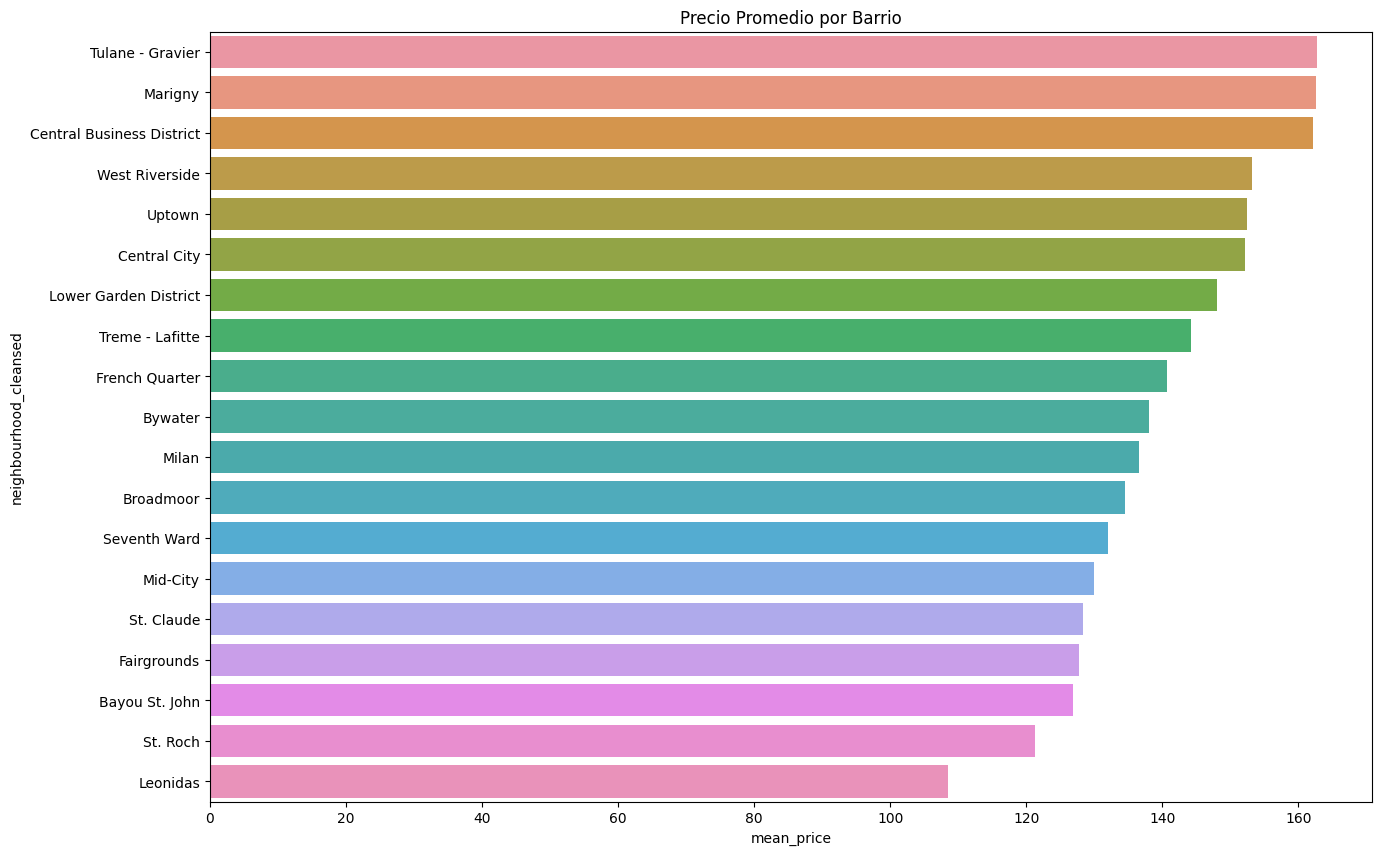

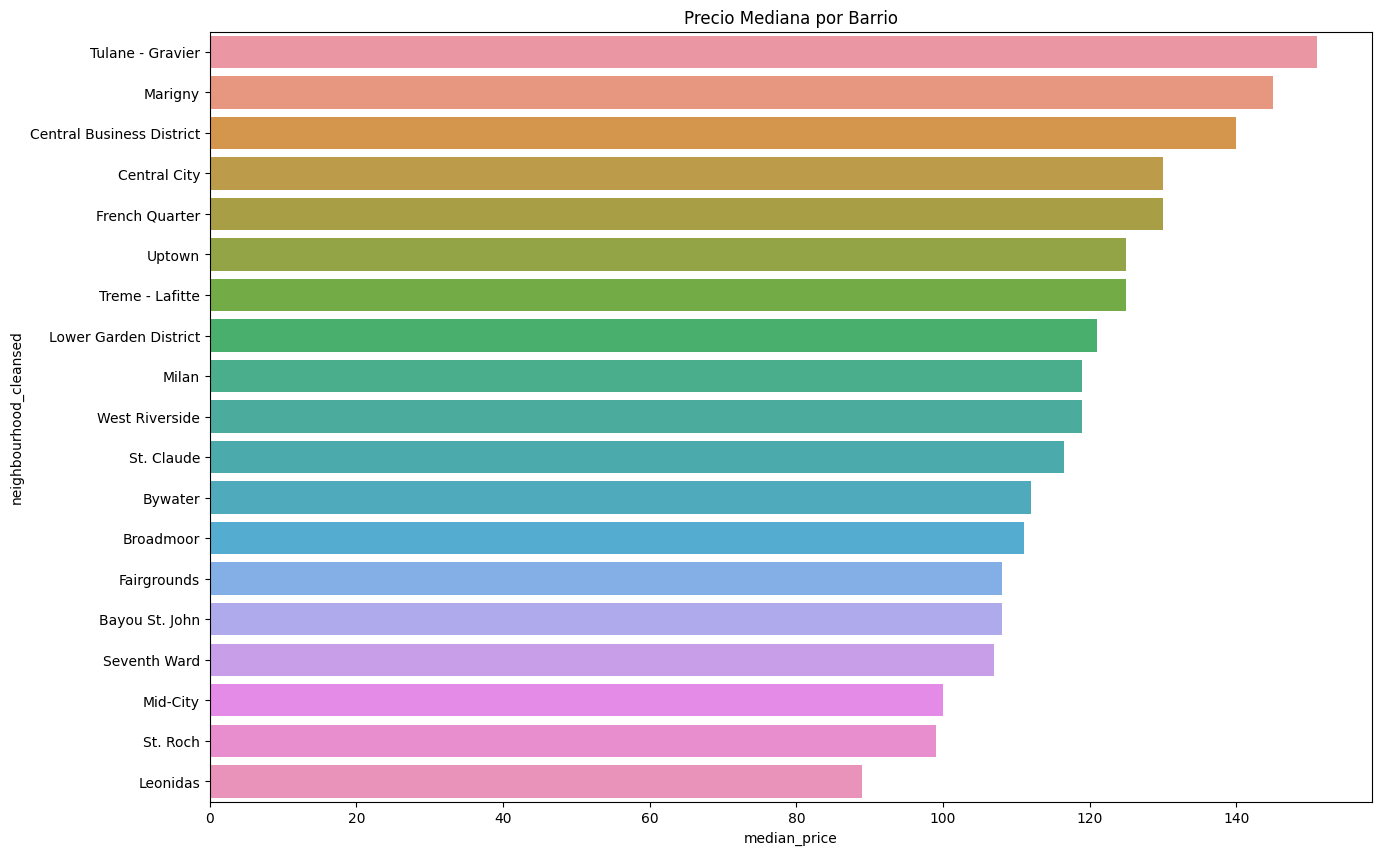

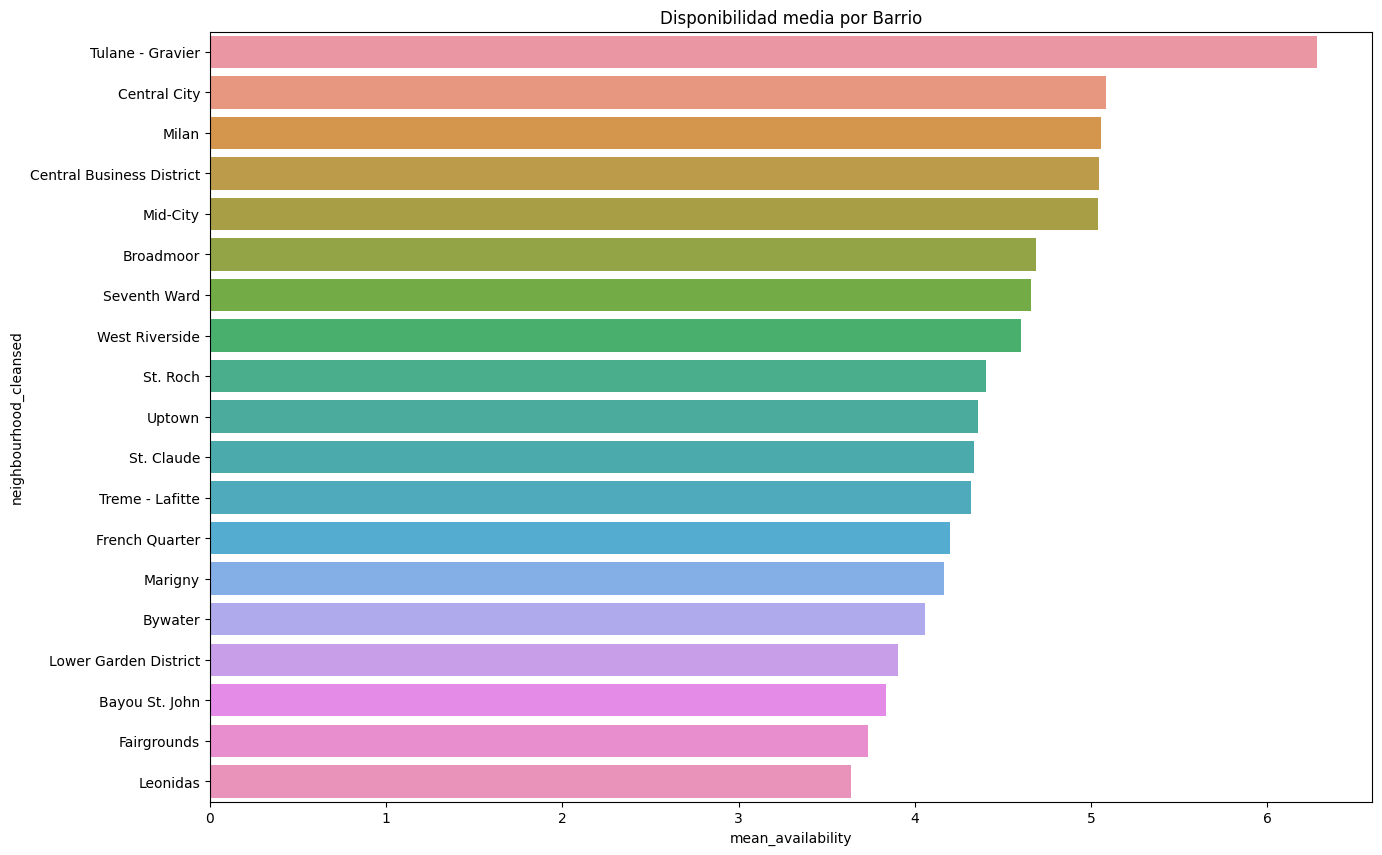

In [230]:
# Agrupar por barrio y calcular estadísticos
neighbourhood_stats = df.groupby('neighbourhood_cleansed').agg({
    'price': ['mean', 'median'],
    'accommodates': 'mean'}).reset_index()

neighbourhood_stats.columns = ['neighbourhood_cleansed', 'mean_price', 'median_price', 'mean_availability']

# Visualización del precio promedio por barrio
plt.figure(figsize=(15, 10))
sns.barplot(x='mean_price', y='neighbourhood_cleansed', data=neighbourhood_stats.sort_values('mean_price', ascending=False))
plt.title('Precio Promedio por Barrio')
plt.show()

# Visualización del precio mediana por barrio
plt.figure(figsize=(15, 10))
sns.barplot(x='median_price', y='neighbourhood_cleansed', data=neighbourhood_stats.sort_values('median_price', ascending=False))
plt.title('Precio Mediana por Barrio')
plt.show()

# Visualización del precio mediana por barrio
plt.figure(figsize=(15, 10))
sns.barplot(x='mean_availability', y='neighbourhood_cleansed', data=neighbourhood_stats.sort_values('mean_availability', ascending=False))
plt.title('Disponibilidad media por Barrio')
plt.show()

- **Central Business District**, **Marigny** y **Tulane - Gravier** tienen los precios promedio más altos, lo que sugiere que son zonas más exclusivas y costosas para los huéspedes. Estos barrios, al estar cerca de lugares de interés y tener una alta demanda, pueden ser una buena opción para inversores.
- Barrios como **Leonidas** y **St. Roch** tienen precios promedio más bajos, lo que sugiere que son zonas más económicas y accesibles para los huéspedes. Estos barrios pueden ser una buena opción para inversores que buscan propiedades más económicas y asequibles.
- La disponibilidad de las propiedades varía notablemente entre barrios. Algunos barrios tienen una alta disponibilidad (**Tulane - Gravier** y **Central City**), lo que sugiere que pueden tener una menor demanda o precios menos competitivos. Por otro lado, barrios con baja disponibilidad pueden tener una alta demanda y precios más competitivos.

### Insights
